In [10]:
import numpy as np
import pandas as pd
import folium
from minisom import MiniSom
import matplotlib.pyplot as plt

In [3]:
cities = pd.read_csv("daten/D_Cities.csv")#von natural earth

In [21]:
citiesN = pd.read_csv("daten/D-CitiesN.csv")
data = citiesN[["xcoordn","ycoordn"]].values

In [23]:
data

array([[0.17309435, 0.30830396],
       [0.43385806, 0.037621  ],
       [0.59810044, 0.65679058],
       [0.29223583, 0.81055565],
       [0.62943316, 0.4428196 ],
       [0.1600557 , 0.58450995],
       [0.29223583, 0.07409328],
       [0.22030021, 0.12575271],
       [0.24727897, 0.47874286],
       [0.18433473, 0.73980976],
       [0.16454906, 0.81055565],
       [0.11689247, 0.62115568],
       [0.13218013, 0.7472982 ],
       [0.33719733, 0.61674063],
       [0.26675795, 0.63388612],
       [0.28504273, 0.5103946 ],
       [0.47836883, 0.41712433],
       [0.43430879, 0.42568206],
       [0.38484928, 0.43139826],
       [0.46458206, 0.33875093],
       [0.37915242, 0.33170319],
       [0.28774247, 0.26638308],
       [0.0782319 , 0.57575107],
       [0.06294425, 0.51183602],
       [0.        , 0.49739872],
       [0.03776376, 0.47149471],
       [0.01798274, 0.42568206],
       [0.00269509, 0.4671792 ],
       [0.02967385, 0.3957873 ],
       [0.10070336, 0.0201338 ],
       [0.

In [24]:
m = folium.Map(location=(51, 10), zoom_start = 6)
for c in range(len(cities)):
    folium.Marker(
        location=[cities.loc[c,"Lat"], cities.loc[c, "Lon"]],
        tooltip=cities.loc[c,"Name_Town"],
     #   popup="Timberline Lodge",
        icon=folium.Icon(color="green"),
    ).add_to(m)

m

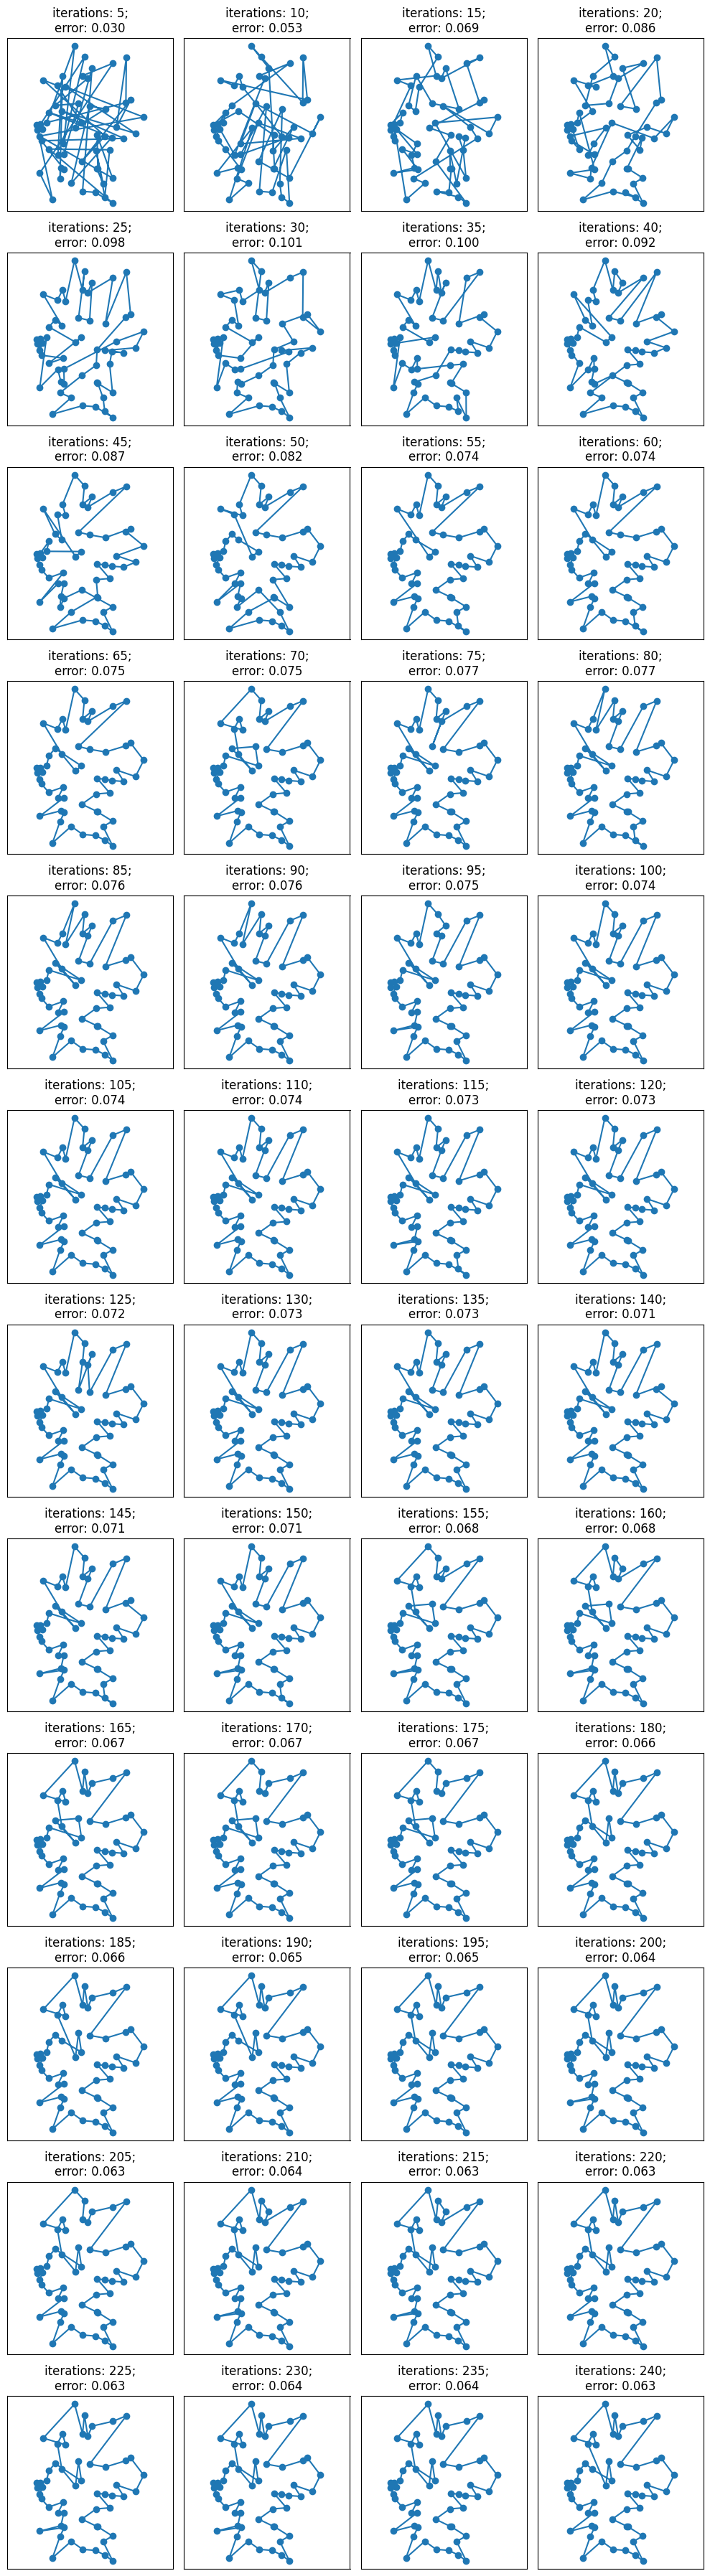

In [29]:
#np.random.RandomState(10)
N_points = len(data)
N_neurons = N_points*2
#t = np.linspace(0, np.pi*2, N_points)
x = data.T[0]
y = data.T[1]

som = MiniSom(1, N_neurons, 2, sigma=13, learning_rate=.3,
              neighborhood_function='gaussian', random_seed=0)

som.random_weights_init(data)

plt.figure(figsize=(10, 36))
for i, iterations in enumerate(range(5, 241, 5)):
    som.train(data, iterations, verbose=False, random_order=False)
    plt.subplot(12, 4, i+1)
    plt.axis('equal')
    plt.scatter(x,y)
    visit_order = np.argsort([som.winner(p)[1] for p in data])
    visit_order = np.concatenate((visit_order, [visit_order[0]]))
    plt.plot(data[visit_order][:,0], data[visit_order][:,1])
    plt.title("iterations: {i};\nerror: {e:.3f}".format(i=iterations, 
                                                        e=som.quantization_error(data)))
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

